In [1]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# S6_Mini_Project(LR)

### Project_Title : Regression_StoreSales_Data_Project



## Importing Libraries

In [2]:
# For Numerical and Statistical Computations

import numpy as np
import pandas as pd

# For Visulizations

import matplotlib.pyplot as plt
import seaborn as sb

# For Scaling, Encoder and Splitting from Sci-Kit

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# For Calculating errors

from sklearn.metrics import mean_squared_error, r2_score

# Warnings

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
# Loading the data

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASETS/DS3_C6_S1_Regression_StoreSales_Data_Project.csv')

# Copy of the data

df_copy = df.copy()

## Data Understanding

In [4]:
# Preview of the data

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Shape of the data

print(f"Structure \n\nRows : {df.shape[0]} and Columns : {df.shape[1]}")

Structure 

Rows : 14204 and Columns : 12


In [6]:
# Datatypes info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [7]:
# Descriptive analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.793380,4.651716,4.555000,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.070301,0.048621,0.003575,0.033143,0.062347,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
# Columns in df

col = list(df.columns)
col

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

* There are totally **14204 Rows** and **12 Columns**.

* There are some **Missing records** in Item_Outlet_Sales > **5000 records**.

* There are like totally 7 categorical columns which need to be encoded

* All these columns are related to store and products and we're going tp use these columns to predict future sales

* From the descriptive 

    * The data spread might be low, STD of all columns falls below their mean values, although the mean values looks higher
    
    * From the Item_Outlet_Sales the max values > 13K which is a difference of 10K from the 3rd median 
    
    * This may hapen because of **Outliers** need to be processed

## Data PreProcessing

In [9]:
# Checking for missing values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [10]:
# Creating a subset of all nan values in target feature for testing purpose

df_test = df[df.isnull().any(axis = 1)]

# Shape of the test data

print(f"Structure of test data \n\nRows : {df_test.shape[0]} and Columns : {df_test.shape[1]}")

# Preview of test data

df_test.head()


Structure of test data 

Rows : 5681 and Columns : 12


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [11]:
# Creating a subset of all not nan values in target feature for trainig purpose

df = df[df.isnull().any(axis = 1)!= True]

# Shape of the train data

print(f"Structure of train data \n\nRows : {df.shape[0]} and Columns : {df.shape[1]}")

# Preview of train data

df.head()

Structure of train data 

Rows : 8523 and Columns : 12


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
# Dropping Item_Identifier from the df

df.drop('Item_Identifier', axis = 1, inplace = True)

In [13]:
# Converting Categorical column into numerical column using LabelEncoding

oc = df.describe(include = 'object').columns

for _ in oc:
    df[_] = LabelEncoder().fit_transform(df[_])
    print(f'{_} \n{df[_].unique()}')


Item_Fat_Content 
[0 1]
Item_Type 
[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
Outlet_Identifier 
[9 3 0 1 5 7 2 8 6 4]
Outlet_Size 
[1 0 2]
Outlet_Location_Type 
[0 2 1]
Outlet_Type 
[1 2 0 3]


* All the numerical columns are encoded into numerical format

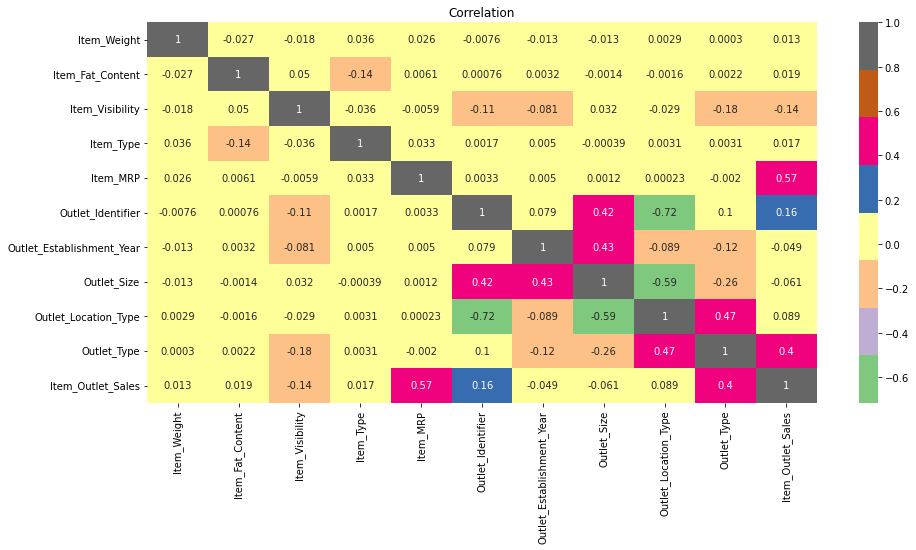

In [14]:
# Finding Correlation - heatmap

plt.figure(figsize = (15,7))
sb.heatmap(df.corr(), annot = True, cmap = 'Accent')
plt.title("Correlation")
plt.show()

*  Incremantal Factors

    * The features which are **Positively highly** correlated are:
        * item_mrp, outlet_identifier, outlet_type

*  Decremantal Factors

    * The features which are **Negatively highly** correlated are:
        * item_visibility, 

* Not Impacting Factors

    * The features which are **not correlated** are:
         * item_weight, item_fat_content, item_type,outlet_szie,   
         outlet_establishment_year

# Observations

* From this we can see the items which are correlated either =Ve or -ve relates   to **Outlets**

* The items which are not correlated are related to **Items**

##  Visulizations

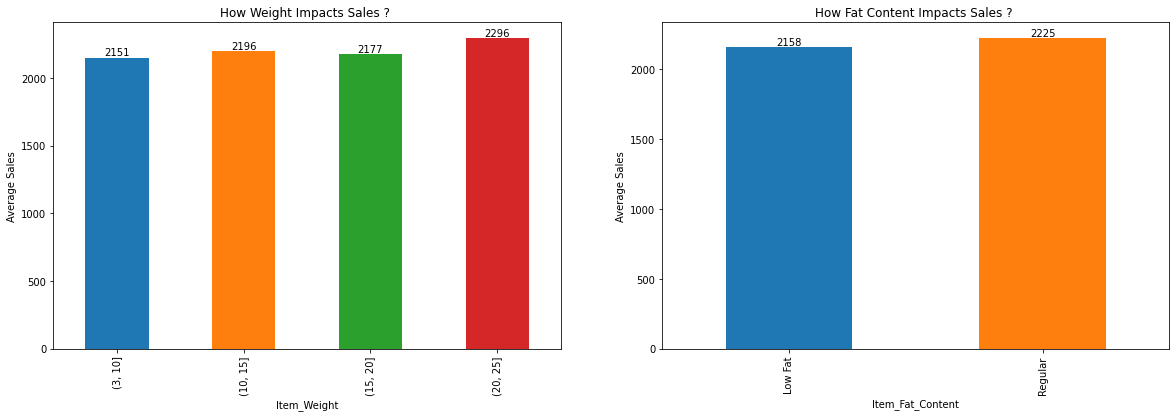

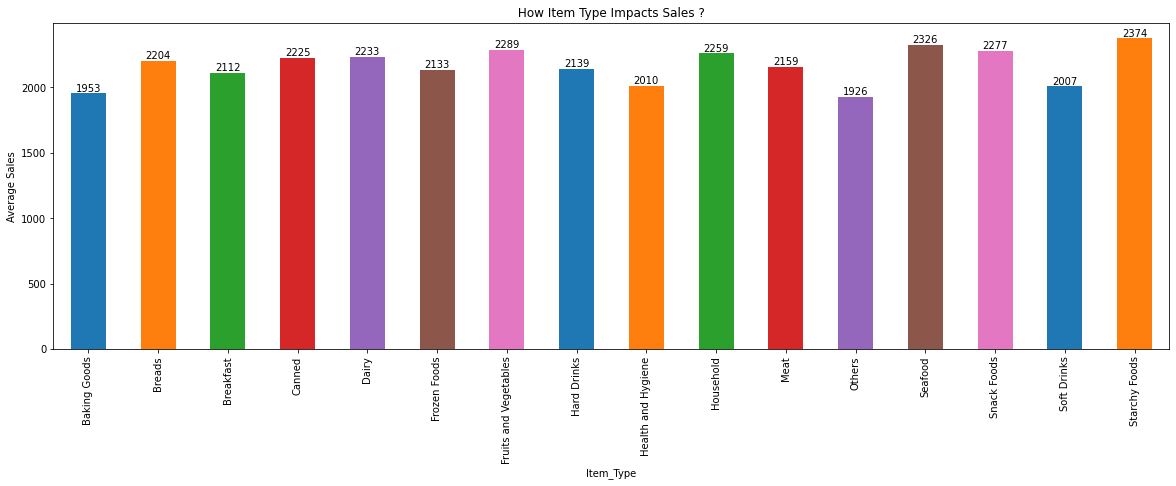

In [15]:
# Definng colors and figuresize

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
plt.figure(figsize = (20, 6))

# Plotting How Weight Impacts Sales ? - barplot

plt.subplot(121)
weight = (pd.cut(df_copy['Item_Weight'],bins =[3, 10, 15, 20, 25]))
plt.title("How Weight Impacts Sales ? ")
plt.ylabel('Average Sales')
ax = df_copy.groupby(weight)['Item_Outlet_Sales'].mean().round().plot.bar(color = colors)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')

# Plotting How Item_Fat_Content Impacts Sales ? - barplot

plt.subplot(122)
plt.title("How Fat Content Impacts Sales ? ")
plt.ylabel('Average Sales')
ax = df_copy.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().round().plot.bar(color = colors)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')

# Plotting How Item_Type Impacts Sales ? - barplot

plt.figure(figsize = (20, 6))
plt.title(" How Item Type Impacts Sales ? ")
plt.ylabel('Average Sales')
ax = df_copy.groupby('Item_Type')['Item_Outlet_Sales'].mean().round().plot.bar(color = colors)
for container in ax.containers:
    ax.bar_label(container,label_type='edge')

plt.show()

* From this its clear that **weight, Fat content and item type is not impacting sales** much good, They are just neutral 

In [16]:
# Feature Selection 

# Selecting Important features

x = df[['Item_MRP', 'Outlet_Identifier', 'Outlet_Type', 'Item_Visibility', 'Item_Fat_Content']]

y = df['Item_Outlet_Sales']

In [17]:
# Scaling using Standard Scaler because the prices may dominate the lower values

x = StandardScaler().fit_transform(x)

In [18]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

print("Shape of x_train - {} x_test {}".format(x_train.shape, x_test.shape))

Shape of x_train - (5966, 5) x_test (2557, 5)


# Model Building

#### LINEAR REGRESSION

In [19]:
# Impoerting Linear Regression

from sklearn.linear_model import LinearRegression

In [20]:
# Builading and Trainig the model

Lr = LinearRegression()

Lr.fit(x_train, y_train)

# Prediction

lr_pred = Lr.predict(x_test)

In [21]:
# Trainng and Testing Score

print(f'Training_Score = {Lr.score(x_train, y_train).round(2)}\nTesting_score = {Lr.score(x_test, y_test).round(2)}')

Training_Score = 0.5
Testing_score = 0.5


In [22]:
# Calculating Slop, Intercept,  MSE, RMSE, and R2 for LR

# Calculating Slope and Intercept

print(f'Intercept : {(Lr.intercept_).round(2)}')
print(f'Slope : {(Lr.coef_).round(2)}')

# calculating the mean squared error

print(f'MSE  = {mean_squared_error(y_test, lr_pred).round(2)}')

# Calculating the root mean squared error using sqrt
 
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, lr_pred)).round(2)}')

# Calculating the r2 score using R2

print(f'R2   = {r2_score(y_test, lr_pred).round(2)}')

Intercept : 2189.86
Slope : [982.31 198.98 652.04 -71.73  20.78]
MSE  = 1435760.54
RMSE = 1198.23
R2   = 0.5


In [23]:
# Creating a list of R2values for each model 

R2_value = {}
R2_value[(r2_score(y_test, lr_pred).round(2))] = 'Linear_Regression'

#### From **Linear Regression**

* The R2 value is **50%** , the model able to explain only 50% of the variance in the outcome variable 
* The trainig and testing score is also equal.

* The RMSE Value is very **large**.

* The most impacting factor of target y is **Item_MRP**.

* The **LR model** can able to produce only **50% better results**.

#### DECISON_TREE_REGRESSOR

In [24]:
# Importing DecisionTreeRegressor from sklearn

from sklearn.tree import DecisionTreeRegressor

In [25]:
# Builading and Trainig the model

Dt = DecisionTreeRegressor()

Dt.fit(x_train, y_train)

# Prediction

dt_pred = Dt.predict(x_test)

In [26]:
# Trainng and Testing Score

print(f'Training_Score = {Dt.score(x_train, y_train).round(2)}\nTesting_score = {Dt.score(x_test, y_test).round(2)}')

Training_Score = 1.0
Testing_score = 0.18


In [27]:
# Calculating MSE, RMSE, and R2 for DTR

# calculating the mean squared error

print(f'MSE  = {mean_squared_error(y_test, dt_pred).round(2)}')

# Calculating the root mean squared error using sqrt
 
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, dt_pred)).round(2)}')

# Calculating the r2 score using R2

print(f'R2   = {r2_score(y_test, dt_pred).round(2)}')

MSE  = 2359025.87
RMSE = 1535.91
R2   = 0.18


#### From **DecisionTreeRegressor**

* The R2 value is **< 50%** , the model able to explain only 20% of the variance in the outcome variable.

* The trainig and testing score have much difference.

        * The testing score is **less** than training score.
        * The model is overfitted

* The RMSE Value is very large i.e **>** LR_Model.

* The **DTR** model can able to produce only **20%** better results.

In [28]:
R2_value[(r2_score(y_test, dt_pred).round(2))] = 'DecisionTreeRegressor'
R2_value

{0.5: 'Linear_Regression', 0.18: 'DecisionTreeRegressor'}

#### RANDOM_FOREST

In [29]:
# Importing RandomForestRegressor from sklearn

from sklearn.ensemble import RandomForestRegressor

In [30]:
# Builading and Trainig the model

Rf = RandomForestRegressor(n_estimators = 30, n_jobs = -1, max_depth = 5,random_state = 20, oob_score = True)

Rf.fit(x_train, y_train)

# Prediction

rf_pred = Rf.predict(x_test)

In [31]:
# Trainng and Testing Score

print(f'Training_Score = {Rf.score(x_train, y_train).round(2)}\nTesting_score = {Rf.score(x_test, y_test).round(2)}')

Training_Score = 0.61
Testing_score = 0.6


In [32]:
# Calculating MSE, RMSE, and R2 for DTR

# calculating the mean squared error

print(f'MSE  = {mean_squared_error(y_test, rf_pred).round(2)}')

# Calculating the root mean squared error using sqrt
 
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, rf_pred)).round(2)}')

# Calculating the r2 score using R2

print(f'R2   = {r2_score(y_test, rf_pred).round(2)}')

MSE  = 1159719.09
RMSE = 1076.9
R2   = 0.6


#### From **RandomForestRegressor**

* The R2 value is **60%** , the model able to explain only 60% of the variance in the outcome variable 
* The trainig and testing score is also equal.

* The RMSE Value is very **large** but it is **less** than **8LR**.

* The **RF model** can able to produce only **60% better results**.

In [33]:
R2_value[(r2_score(y_test, rf_pred).round(2))] = 'RandomForestRegressor'
R2_value

{0.5: 'Linear_Regression',
 0.18: 'DecisionTreeRegressor',
 0.6: 'RandomForestRegressor'}

#### ADABOSST_REGRESSOR

In [34]:
# importing AdaBoostRegressor

from sklearn.ensemble import AdaBoostRegressor

In [35]:
# Builading and Trainig the model

Ab = AdaBoostRegressor()

Ab.fit(x_train, y_train)

# Prediction

ab_pred = Ab.predict(x_test)

In [36]:
# Trainng and Testing Score

print(f'Training_Score = {Ab.score(x_train, y_train).round(2)}\nTesting_score = {Ab.score(x_test, y_test).round(2)}')

Training_Score = 0.51
Testing_score = 0.49


In [37]:
# Calculating MSE, RMSE, and R2 for DTR

# calculating the mean squared error

print(f'MSE  = {mean_squared_error(y_test, ab_pred).round(2)}')

# Calculating the root mean squared error using sqrt
 
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, ab_pred)).round(2)}')

# Calculating the r2 score using R2

print(f'R2   = {r2_score(y_test, ab_pred).round(2)}')

MSE  = 1474922.88
RMSE = 1214.46
R2   = 0.49


#### From **AdaBoostRegressor**

* The R2 value is **45%**, the model able to explain only 45% of the variance in the outcome variable.

* The trainig and testing score is almost equal.

* The RMSE Value is very **large**, i.e it's **>** than **LR and RF**.

* The **AB_Model** can able to produce only **45% better results**.

In [38]:
R2_value[(r2_score(y_test, ab_pred).round(2))] = 'AdaBoostRegressor'
R2_value

{0.5: 'Linear_Regression',
 0.18: 'DecisionTreeRegressor',
 0.6: 'RandomForestRegressor',
 0.49: 'AdaBoostRegressor'}

#### KNN_REGRESSOR

In [39]:
# Impoting KNN library from scikit 

from sklearn.neighbors import KNeighborsRegressor

RMSE-K=  1 :is 1510.958836039891
RMSE-K=  2 :is 1295.8166956293933
RMSE-K=  3 :is 1231.669310774783
RMSE-K=  4 :is 1191.3668577019855
RMSE-K=  5 :is 1171.1264928065752
RMSE-K=  6 :is 1161.913516136756
RMSE-K=  7 :is 1149.1212522510846
RMSE-K=  8 :is 1145.9675343579609
RMSE-K=  9 :is 1137.741614273038
RMSE-K=  10 :is 1132.5294459736313
RMSE-K=  11 :is 1125.5833183455043
RMSE-K=  12 :is 1121.1176885393338
RMSE-K=  13 :is 1119.7923375499915
RMSE-K=  14 :is 1113.702237422479
RMSE-K=  15 :is 1110.8792773615983
Minimum error:- 1110.8792773615983 at K = 15


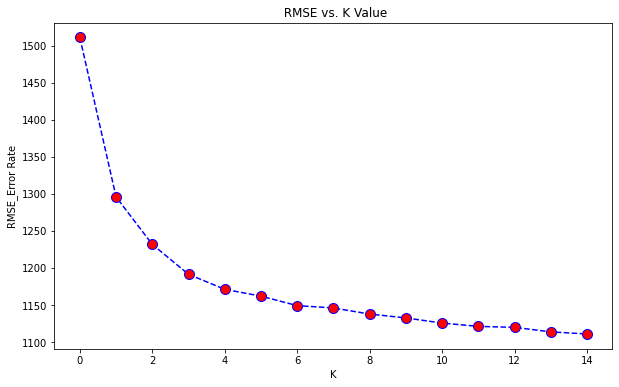

In [40]:
# Finding best k neighbors

rmse_val = []                     
for K in range(15):
    K = K + 1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)       
    y_pred = model.predict(x_test)  
    error = np.sqrt(mean_squared_error(y_test, y_pred))     
    rmse_val.append(error)           
    print('RMSE-K= ', K, ':is', error)
print("Minimum error:-",min(rmse_val),"at K =",rmse_val.index(min(rmse_val))+1)

# Plotting the error rate for respective neighbors

plt.figure(figsize=(10,6))
plt.plot(range(15), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor = 'red', markersize = 10)
plt.title(' RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE_Error Rate')
plt.show()

In [41]:
# Implementing GridsearchCV

from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[10,11,12,13,14,15,16,17,18,19,20]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train, y_train)
model.best_params_

{'n_neighbors': 19}

In [42]:
# Builading and Trainig the model

Kn = KNeighborsRegressor(n_neighbors = 19, n_jobs = -1)

Kn.fit(x_train, y_train)

# Prediction

kn_pred = Kn.predict(x_test)

In [43]:
# Trainng and Testing Score

print(f'Training_Score = {Kn.score(x_train, y_train).round(2)}\nTesting_score = {Kn.score(x_test, y_test).round(2)}')

Training_Score = 0.62
Testing_score = 0.58


In [44]:
# Calculating MSE, RMSE, and R2 for DTR

# calculating the mean squared error

print(f'MSE  = {mean_squared_error(y_test, kn_pred).round(2)}')

# Calculating the root mean squared error using sqrt
 
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, kn_pred)).round(2)}')

# Calculating the r2 score using R2

print(f'R2   = {r2_score(y_test, kn_pred).round(2)}')

MSE  = 1210897.93
RMSE = 1100.41
R2   = 0.58


#### From **KNeighborsRegressor**

* The R2 value is **58%** , the model able to explain only 58% of the variance in the outcome variable.

* The trainig and testing score is < training score.

* The RMSE Value is very **large** anďit's < than **LR, DTR, ADR**.

* The **KNN model** can able to produce only **58% better results**.

In [45]:
R2_value[(r2_score(y_test, kn_pred).round(2))] = 'KNeighborsRegressor'
R2_value

{0.5: 'Linear_Regression',
 0.18: 'DecisionTreeRegressor',
 0.6: 'RandomForestRegressor',
 0.49: 'AdaBoostRegressor',
 0.58: 'KNeighborsRegressor'}

In [46]:
R2_value = dict(sorted(R2_value.items()))
R2_value

{0.18: 'DecisionTreeRegressor',
 0.49: 'AdaBoostRegressor',
 0.5: 'Linear_Regression',
 0.58: 'KNeighborsRegressor',
 0.6: 'RandomForestRegressor'}

In [47]:
R2_value

{0.18: 'DecisionTreeRegressor',
 0.49: 'AdaBoostRegressor',
 0.5: 'Linear_Regression',
 0.58: 'KNeighborsRegressor',
 0.6: 'RandomForestRegressor'}

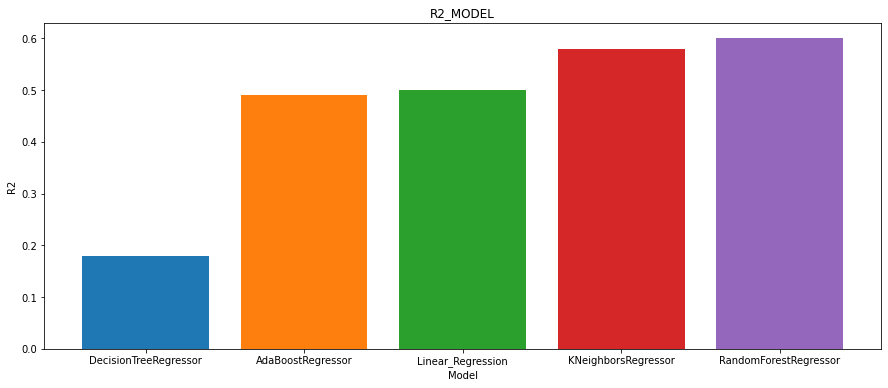

In [48]:
names = list(R2_value.keys())
values = list(R2_value.values())
plt.figure(figsize = (15,6))
plt.title('R2_MODEL')
plt.bar(x = values, height = names, tick_label = values, color = colors)
plt.xlabel('Model')
plt.ylabel('R2')
plt.show()

# Conclusion

* From this chart we can see the R2 values for 5 different model.
* The model which gives goog result is RandomForestRegressor
* The model which was built poor is DecicionTreeRegressor

## Finally, RandomForestRegressor can be used to build the data to predict sales

# Test Data Subset

In [49]:
# Dropping Item_Identifier from the df_test

df_test.drop('Item_Identifier', axis = 1, inplace = True)

df_test.drop('Item_Outlet_Sales', axis = 1, inplace = True)

In [50]:
# Converting Categorical column into numerical column using LabelEncoding for df_test

oc = df_test.describe(include = 'object').columns

for _ in oc:
    df_test[_] = LabelEncoder().fit_transform(df_test[_])
    print(f'{_} \n{df_test[_].unique()}')

Item_Fat_Content 
[0 1]
Item_Type 
[13  4 11  6  0  8  1  7 12 14  9  5 10  3 15  2]
Outlet_Identifier 
[9 2 0 5 8 3 7 4 1 6]
Outlet_Size 
[1 2 0]
Outlet_Location_Type 
[0 1 2]
Outlet_Type 
[1 0 3 2]


In [51]:
df_test = df_test[['Item_MRP', 'Outlet_Identifier', 'Outlet_Type', 'Item_Visibility', 'Item_Fat_Content']]

In [52]:
# Builading and Trainig the model for subset of test data

Rf = RandomForestRegressor(n_estimators = 30, n_jobs = -1, max_depth = 5,random_state = 20, oob_score = True)

Rf.fit(x_train, y_train)

# Prediction

rf_pred = Rf.predict(df_test)

In [53]:
# Predicted values of test data
rf_pred

array([3923.29153147, 3923.29153147, 4257.55564145, ..., 3923.29153147,
       3923.29153147, 3923.29153147])